In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#test1
my_numpy_array=np.random.randn(3,4)
df=pd.DataFrame(my_numpy_array, columns=["A","B","C","D"])
df


,A,B,C,D
0,-0.895964,-0.305810,0.208324,-1.084781
1,0.590433,0.817781,-0.367092,-0.072781
2,-1.502322,0.102685,-1.033451,1.815831


In [3]:
#test2
df["A"]=df["A"]+df["B"]
df

,A,B,C,D
0,-1.201774,-0.305810,0.208324,-1.084781
1,1.408215,0.817781,-0.367092,-0.072781
2,-1.399638,0.102685,-1.033451,1.815831


In [4]:
#1-we read the csv file and display the 5 first informations
data = pd.read_csv("./titanic-passengers.csv",delimiter=';')
data_top=data.head()
data_top

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [6]:
#2-checking if there are any null values but it is not efficient
data_null=data.head().isnull()
data_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#3-we will need datatype
data.dtypes


PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#4-check total null values for each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#5-we replace the null values with the most appropriate ones
#we check the total of null values
n=data.isnull().sum().sum()
if(n==0):
    print("our data is ready to be used")
else:
    print("No! there are :",n,"total null values")
    #we check if there are any null values
    for col in data.columns:
        #if a column doesnt have any null values then there is no point processing it
        if(data[col].isnull().sum()>0):
            if(str(data.dtypes[col]) in ["int64","float64","int32","float32"]):
                #if our data numerical (is either float or int) 
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(data[col].mean(),inplace=True)
                print(col,"after",data[col].isnull().sum())
            elif (str(data.dtypes[col])=="object"):
                #if our data is categorical (is an object)
                a=data[col].mode()
                l=len(a)
                s=a[l-1]
                print(s)
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(s,inplace=True)
                print(col,"after",data[col].isnull().sum())
    print("our data should now be ready to be used.")            
        
    


No! there are : 866 total null values
Age before 177
Age after 0
G6
Cabin before 687
Cabin after 0
S
Embarked before 2
Embarked after 0
our data should now be ready to be used.


In [10]:
#test3
data['Age']

0      28.000000
1      25.000000
2      20.000000
3      29.000000
4      31.000000
         ...    
886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, Length: 891, dtype: float64

<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

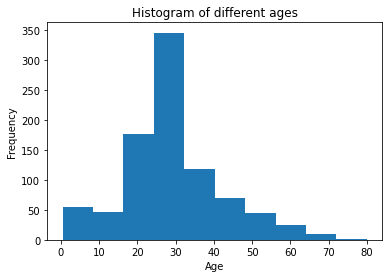

In [11]:
#6-visualize different ages and their frequencies
plt.title("Histogram of different ages")
plt.xlabel("Age")
data["Age"].plot.hist()



(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

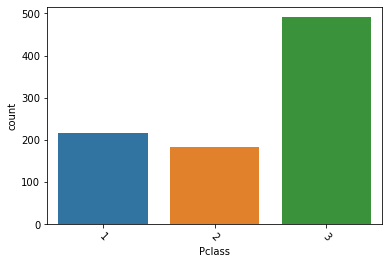

In [12]:
#sns.displot(data["Age"],bins=10,hist=True,kde=True, color="red")
sns.countplot(x="Pclass",data=data)
plt.xticks(rotation=-45)

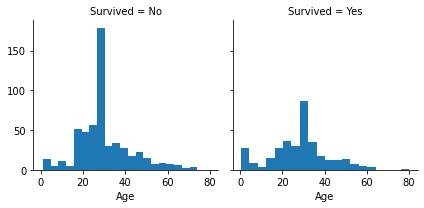

In [13]:
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,'Age',bins=20)
#we can conclude from this that:
# * almost no one over the age of 60 have survived 
# * most middle aged passengers unfortunately lost their lives 


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

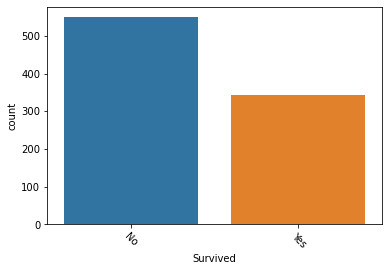

In [14]:
g=sns.countplot(x="Survived",data=data)
plt.xticks(rotation=-45)
# conclusion:
# * survivers are very few

In [15]:
dataF=data[data["Sex"]=="female"]
#g=sns.FacetGrid(dataF,col="Survived")
#g.map(plt.hist,'Sex',bins=20)
dataF

#pie chart describing survival rate of female passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,G6,C
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,G6,S
11,294,No,3,"Haas, Miss. Aloisia",female,24.000000,0,0,349236,8.8500,G6,S
12,755,Yes,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.000000,1,2,220845,65.0000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,360,Yes,3,"Mockler, Miss. Helen Mary ""Ellie""",female,29.699118,0,0,330980,7.8792,G6,Q
882,775,Yes,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,G6,S
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S


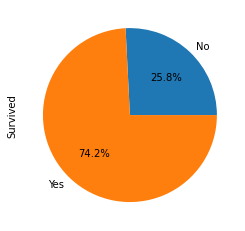

In [16]:
dataF = dataF.groupby(["Survived"])["Survived"].size()
dataF.plot.pie(autopct="%.1f%%");
#almost 75 percent of females have survived

In [17]:
dataM=data[data["Sex"]=="Male"]
dataM = dataM.groupby(["Survived"]).size()
dataM

Series([], dtype: int64)

C:\Users\ahmdc\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ahmdc\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


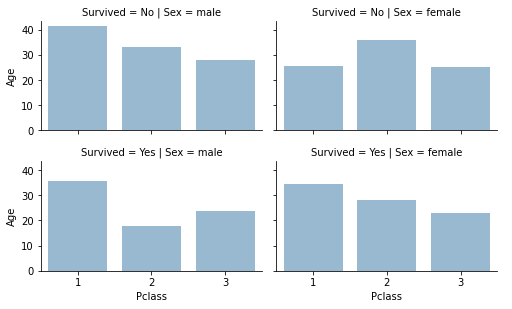

In [18]:
grid = sns.FacetGrid(data, row="Survived", col="Sex", size=2.2, aspect=1.6)
grid.map(sns.barplot,"Pclass",  'Age', alpha=.5, ci=None)
grid.add_legend()
#from here we can see that more first class passengers have survived over the lower class ones

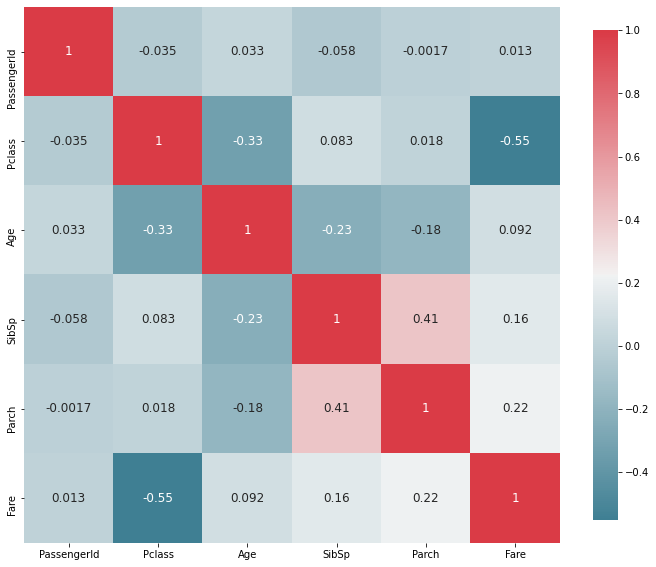

In [19]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })   

plot_correlation_map(data)

In [20]:
#correlation between Pclas and survived
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Survived to numerical format
old_data=data
data.replace(cleanup, inplace=True)
data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
df=data.drop(['Name'], axis=1)
df['Title'] = pd.Series(data['Name'], index=df.index)


In [22]:
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":   "Royalty",
"Don":"Royalty","Sir" :"Royalty","Lady" :"Royalty","the Countess": "Royalty","Dona":"Royalty","Mme":"Miss","Mlle":       "Miss",
"Miss" :"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master":"Master"}

In [23]:
df['Title']=df['Title'].str.split(", ").map(lambda x:x[1]).str.split(".").map(lambda x:x[0]).map(Title_Dictionary)


In [24]:
df.Title.unique()


array(['Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

In [26]:
df["Title"].str

In [ ]:
#this is just to test if the 
df[df['Title'] =="Master"]

In [ ]:
grid = sns.FacetGrid(df, row="Sex", col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot,"Title",  'Age', alpha=.5, ci=None)
grid.add_legend()

In [ ]:

grid = sns.FacetGrid(data=df, row="Sex", col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot,"Title",  'Age', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(data=df, row="Sex", col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot,"Title",  'Fare', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1
#we added '1' because the person is counted in the family size

In [ ]:
df

In [ ]:
grid = sns.FacetGrid(data=df, row="Survived", col="Pclass", height=2.2, aspect=1.6)
grid.map(sns.barplot,"FamilySize",  'Fare', alpha=.5, ci=None)
grid.add_legend()